# CogSys Mathematics and methods
## Methods 2: Cluster analysis
## Juha Nuutinen

## Import modules and read data

In [6]:
import numpy as np
import pandas as pd
from sklearn import cluster

# The number of drone depots (centroids)
N_DEPOTS = 10

# Data file must be in the same directory as this notebook
df = pd.read_csv("drone_delivery_v1.csv", sep=';')

# Remove redundant id column
df.drop(columns=["clientid"], inplace=True)

df.head(10)

,x,y
0,622.771572,164.857623
1,416.357298,630.193634
2,292.735020,567.333231
3,737.211288,166.225676
4,540.475375,682.912298
5,535.469492,318.439661
6,640.380050,870.833221
7,235.772075,359.048203
8,481.896884,661.491838
9,730.032789,312.177817


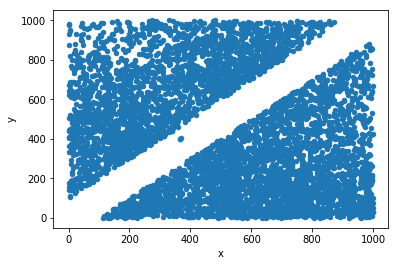

In [7]:
df.plot.scatter(x='x', y='y')

## K-means clustering
Perform the k-means clustering and attach the cluster labels to the data.

In [8]:
# Run kmeans with the number of centroids defined in N_DEPOTS
kmeans = cluster.KMeans(n_clusters=N_DEPOTS)
kmeans.fit(df)

centroids = kmeans.cluster_centers_
centroids_df = pd.DataFrame(centroids, columns=df.columns.get_values())

print(centroids_df)

df["depot"] = kmeans.labels_
df.head(10)

            x           y
0  448.479291  729.041826
1  103.436013  327.495615
2  847.075689  125.349886
3  548.330893  177.780573
4  183.382517  830.462714
5  747.165267  407.859809
6  201.251653  523.888787
7  310.938808   86.638283
8  882.784995  646.039360
9  626.018727  894.483179


,x,y,depot
0,622.771572,164.857623,3
1,416.357298,630.193634,0
2,292.735020,567.333231,6
3,737.211288,166.225676,2
4,540.475375,682.912298,0
5,535.469492,318.439661,3
6,640.380050,870.833221,9
7,235.772075,359.048203,1
8,481.896884,661.491838,0
9,730.032789,312.177817,5


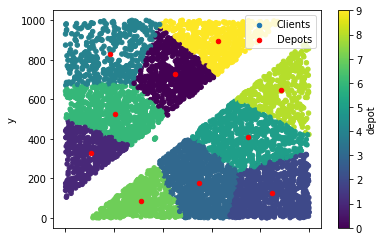

In [9]:
ax = df.plot.scatter(x='x', y='y', c="depot", colormap="viridis", label="Clients")
centroids_df.plot.scatter(x='x', y='y', c="red", label="Depots", ax=ax)

## Agglomerative hierarchical clustering

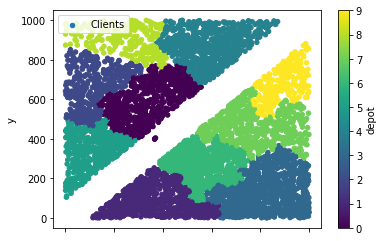

In [10]:
df = pd.read_csv("drone_delivery_v1.csv", sep=';')
df.drop(columns=["clientid"], inplace=True)

# Run agglomerative clustering with the number of clusters defined in N_DEPOTS
# Ward and average linkage provide regular cluster sizes,
# single linkage results in a "rich get richer" behavior
agglomerative = cluster.AgglomerativeClustering(n_clusters=N_DEPOTS,
                                                affinity="euclidean",
                                                linkage="ward")
agglomerative.fit(df)

df["depot"] = agglomerative.labels_

df.plot.scatter(x='x', y='y', c="depot", colormap="viridis", label="Clients")

## Observations
Computation time does not seem to significantly increase for neither the k-means nor the agglomerative, when number of clusters is increased.

K-means clustering seems to produce more uniformly shaped clusters, whereas agglomerative produces more varied clusters. The linkage used in it affects the cluster shapes and sizes greatly.